In [1]:
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read in the Star Trek Astronomical Objects

sta = pd.read_parquet('../WPscraped/StarTrek_Astronomical_Objects.parquet')

# Read in the Star Wars Astronomical Objects

swa = pd.read_parquet('../WPscraped/StarWars_Planets.parquet')

In [3]:
# View sta info
sta.info()

# View sta
sta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    2404 non-null   object
 1   astronomicalObjectType  2363 non-null   object
dtypes: object(2)
memory usage: 37.7+ KB


,name,astronomicalObjectType
0,'aucdet IX,PLANET
1,'etnap Nebula,NEBULA
2,1 Centauri,STAR_SYSTEM
3,11 Leonis Minoris,STAR_SYSTEM
4,1889 V,COMET


In [4]:
# View swa info
swa.info()

# View swa
swa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                2562 non-null   object
 1   suns                2562 non-null   object
 2   moons               2562 non-null   object
 3   atmosphere          2562 non-null   object
 4   climate             2562 non-null   object
 5   native_species      2562 non-null   object
 6   immigrated_species  2562 non-null   object
 7   population          2562 non-null   object
 8   major_exports       2562 non-null   object
 9   affiliation         2562 non-null   object
 10  description         2562 non-null   object
dtypes: object(11)
memory usage: 220.3+ KB


,name,suns,moons,atmosphere,climate,native_species,immigrated_species,population,major_exports,affiliation,description
0,3rd Moon,None,None,None,None,None,Various,None,None,None,The 3rd Moon was a terrestrial moon located in...
1,7G sector,None,None,None,None,None,None,None,None,Galactic Empire,The 7G sector was a sector of space located in...
2,Yasooska,None,None,None,None,None,None,None,None,None,Yasooska was one of the four moons of the plan...
3,Aakaash,None,None,None,None,None,None,None,None,None,Aakaash was a star of the star system of the s...
4,Aakaash system,Aakaash,None,None,None,None,Humans,174.2 billion,None,Land & Sky Corporation,The Aakaash system was located in the Oplovis ...


In [5]:
# Let's look into the Star Trek astronomical objects

stcount = sta['astronomicalObjectType'].value_counts()

stcount

PLANET              1061
STAR_SYSTEM          529
SECTOR               190
STAR                 125
REGION               113
M_CLASS_PLANET        95
NEBULA                62
CLUSTER               37
CONSTELLATION         30
MOON                  29
COMET                 17
PLANETOID             17
ASTEROID_BELT         12
GAS_GIANT_PLANET      11
ASTEROID               8
GALAXY                 8
L_CLASS_PLANET         6
M_CLASS_MOON           3
QUASAR                 3
ROGUE_PLANET           2
Y_CLASS_PLANET         2
K_CLASS_PLANET         2
H_CLASS_PLANET         1
Name: astronomicalObjectType, dtype: int64

It looks like there are 23 types of astronomical objects listed in the Star Trek data.  We will combine some of the information into consolidated objects. All planets will be grouped together, all moons will be grouped together, and asteroids and asteroid belts will be grouped together.

In [6]:
# We will start by creating a boolean column for all planets

sta['planet'] = sta['astronomicalObjectType'].str.contains('PLANET')

# We will create a boolean column for all moons

sta['moon'] = sta['astronomicalObjectType'].str.contains('MOON')

# We will create a boolean column for all asteroids

sta['asteroid'] = sta['astronomicalObjectType'].str.contains('ASTEROID')

# view updated dataframe

sta.head()


,name,astronomicalObjectType,planet,moon,asteroid
0,'aucdet IX,PLANET,True,False,False
1,'etnap Nebula,NEBULA,False,False,False
2,1 Centauri,STAR_SYSTEM,False,False,False
3,11 Leonis Minoris,STAR_SYSTEM,False,False,False
4,1889 V,COMET,False,False,False


In [7]:
# Create a count for # of planets

stplanets = sta['planet'].sum()
print(f' There are {stplanets} planets listed')

# Create a count for # of moons
stmoons = sta['moon'].sum()
print(f' There are {stmoons} moons listed')

# Create a count for # of asteroids
stasteroid = sta['asteroid'].sum()
print(f' There are {stasteroid} asteroids listed')

# Create a count for # of other
stother = (sta['name'].count() - stplanets - stmoons - stasteroid)
print(f' There are {stother} other objects')

 There are 1197 planets listed
 There are 32 moons listed
 There are 20 asteroids listed
 There are 1155 other objects


We have the Star Trek data, so let's work on the Star Wars data.  There are no fields which easily identify the type of astronomincal object.  There are a lot of columns and data for Star Wars' objects, so we will create a new dataframe and see if we can group items together through the description paragraph.

In [8]:
# Create a new dataframe with name and description

swa_short = swa[['name', 'description']]

# Test swa_short
swa_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         2562 non-null   object
 1   description  2562 non-null   object
dtypes: object(2)
memory usage: 40.2+ KB


In [9]:
# We will start by dropping items that have a name with sector or system

swa_2 = swa_short[swa_short['name'].str.contains('sector|system') == False]

swa_2.head(10)

,name,description
0,3rd Moon,The 3rd Moon was a terrestrial moon located in...
2,Yasooska,Yasooska was one of the four moons of the plan...
3,Aakaash,Aakaash was a star of the star system of the s...
5,Aaloth,Aaloth was a Twi'lek colony planet in the Gaul...
6,Aargau,Aargau was an astronomical object located in t...
7,Ab Dalis,Ab Dalis was a swampy wasteland world situated...
9,Abafar,Abafar was a remote desert planet located with...
11,Abafed,Abafed was a yellow star situated in the Abafa...
12,Abednedo (planet),Abednedo was a planet located on the Corellian...
13,Abelor,Abelor was a planet located in the Mid Rim and...


In [10]:
# We will drop items that have sun in the name

swa_2 = swa_2[swa_2['name'].str.contains('sun') == False]

swa_2.head(10)

,name,description
0,3rd Moon,The 3rd Moon was a terrestrial moon located in...
2,Yasooska,Yasooska was one of the four moons of the plan...
3,Aakaash,Aakaash was a star of the star system of the s...
5,Aaloth,Aaloth was a Twi'lek colony planet in the Gaul...
6,Aargau,Aargau was an astronomical object located in t...
7,Ab Dalis,Ab Dalis was a swampy wasteland world situated...
9,Abafar,Abafar was a remote desert planet located with...
11,Abafed,Abafed was a yellow star situated in the Abafa...
12,Abednedo (planet),Abednedo was a planet located on the Corellian...
13,Abelor,Abelor was a planet located in the Mid Rim and...


In [11]:
# We will create a boolean column for all planets

swa_2['planet'] = swa_2['description'].str.contains('planet')

# We will create a boolean column for all moons

swa_2['moon'] = swa_2['description'].str.contains('moon')

# We will create a boolean column for all asteroids

swa_2['asteroid'] = swa_2['description'].str.contains('asteroid')

# view updated dataframe

swa_2.info()
swa_2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2560
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         1983 non-null   object
 1   description  1983 non-null   object
 2   planet       1983 non-null   bool  
 3   moon         1983 non-null   bool  
 4   asteroid     1983 non-null   bool  
dtypes: bool(3), object(2)
memory usage: 52.3+ KB


,name,description,planet,moon,asteroid
0,3rd Moon,The 3rd Moon was a terrestrial moon located in...,False,True,False
2,Yasooska,Yasooska was one of the four moons of the plan...,True,True,False
3,Aakaash,Aakaash was a star of the star system of the s...,False,False,False
5,Aaloth,Aaloth was a Twi'lek colony planet in the Gaul...,True,False,False
6,Aargau,Aargau was an astronomical object located in t...,False,False,False


We've created the subset for Star Wars astronomical objects, however, it appears that some of the descriptions may contain both planet and moon.  We will flag those and create a new dataframe for those to review to see how many there are to determine if there is a practical solution without reviewing each item.

In [12]:
# Create a dataframe with both planet and moon true booleans

swa_true = swa_2[(swa_2['planet'] == True) & (swa_2['moon'] == True)]

swa_true.info()
swa_true.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 2 to 2527
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         201 non-null    object
 1   description  201 non-null    object
 2   planet       201 non-null    bool  
 3   moon         201 non-null    bool  
 4   asteroid     201 non-null    bool  
dtypes: bool(3), object(2)
memory usage: 5.3+ KB


,name,description,planet,moon,asteroid
2,Yasooska,Yasooska was one of the four moons of the plan...,True,True,False
37,Agaris' moon,A moon orbited the planet Agaris in Wild Space.\n,True,True,False
49,Ajara,Ajara was a gas giant planet located in the Ca...,True,True,False
56,Alaris,Alaris was a planet of the Mytaranor sector's ...,True,True,False
57,Alaris Prime,Alaris Prime was one of the several moons that...,True,True,False
108,Antar 4,"Antar 4, also known simply as Antar and the Go...",True,True,False
110,Anthan 1,Anthan 1 was a moon that orbited the planet An...,True,True,False
111,Anthan 12,Anthan 12 was a moon that orbited the planet A...,True,True,False
112,Anthan 13,Anthan 13 was a moon that orbited the planet A...,True,True,False
113,Anthan 14,Anthan 14 was a moon that orbited the planet A...,True,True,False


There are 201 astronomical objects that cannot be easily categorized as moons or planets.  We will try to group these as best as we can using "was a moon" or "was a planet".  This will skip some items, but we will try first.

In [13]:
# We will try to see if we can find moons with "was a moon" 

swa_true['moon2'] = swa_true['description'].str.contains('was a moon')

# We will try to see if we can find planets with "was a planet"ArithmeticError
 
swa_true['planet2'] = swa_true['description'].str.contains('was a planet')

# view updated dataframe
swa_true.head()

C:\Users\musta\AppData\Local\Temp\ipykernel_17668\2978645257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swa_true['moon2'] = swa_true['description'].str.contains('was a moon')
C:\Users\musta\AppData\Local\Temp\ipykernel_17668\2978645257.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swa_true['planet2'] = swa_true['description'].str.contains('was a planet')


,name,description,planet,moon,asteroid,moon2,planet2
2,Yasooska,Yasooska was one of the four moons of the plan...,True,True,False,False,False
37,Agaris' moon,A moon orbited the planet Agaris in Wild Space.\n,True,True,False,False,False
49,Ajara,Ajara was a gas giant planet located in the Ca...,True,True,False,False,False
56,Alaris,Alaris was a planet of the Mytaranor sector's ...,True,True,False,False,True
57,Alaris Prime,Alaris Prime was one of the several moons that...,True,True,False,False,False


In [14]:
# Create a dataframe with both planet2 and moon2 true booleans

swa_true2 = swa_true[(swa_true['moon2'] == True) & (swa_true['planet2'] == True)]

swa_true2.info()
swa_true2.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         0 non-null      object
 1   description  0 non-null      object
 2   planet       0 non-null      bool  
 3   moon         0 non-null      bool  
 4   asteroid     0 non-null      bool  
 5   moon2        0 non-null      bool  
 6   planet2      0 non-null      bool  
dtypes: bool(5), object(2)
memory usage: 0.0+ bytes


,name,description,planet,moon,asteroid,moon2,planet2


In [15]:
# count of planet2 

swp2 = swa_true['planet2'].sum()

# count of moon2

swm2 = swa_true['moon2'].sum()

# create f strings for count
print(f'There are {swp2} planets in the combined results')
print(f'There are {swm2} moons in the combined results')

There are 30 planets in the combined results
There are 27 moons in the combined results


This means that out of the 201 unknown objects, 57 have been identified leaving 144 objects.  We will classify these as NEI, or "Not Easily Identifiable".  We will Update the numbers of planets and moons for to account for these.

In [16]:
# Create a new star wars count that has the original counts, minus the "trued" count, plus the updates

swa_planets = (swa_2['planet'].sum() - swa_true['planet'].sum() + swp2)

swa_moons = (swa_2['moon'].sum() - swa_true['moon'].sum() + swm2)

swa_asteroids = (swa_2['asteroid'].sum())

swa_nei = (swa_true['planet'].sum() - swp2 - swm2)

# Print the totals
print(f'There are {swa_planets} planets identified')
print(f'There are {swa_moons} moons identified')
print(f'There are {swa_asteroids} asteroids identified')
print(f'There are {swa_nei} Not Easily Identified objects')



There are 1029 planets identified
There are 122 moons identified
There are 55 asteroids identified
There are 144 Not Easily Identified objects


We have only pulled 1350 objects, so 633 are missing.  We will check to see if they are not ringing true for any booleans and we will add those to the NEIs.

In [17]:
# We will create a count of all previously unidentified objects.  
sw_noid = swa_2[(swa_2['planet'] == False) & (swa_2['moon'] == False) & (swa_2['asteroid'] == False)].count()

# Create a count for just unidentified objects
sw_unidentified = sw_noid['name'].sum()


print(f'There are {sw_unidentified} unidentified objects')

There are 657 unidentified objects


We will add the unidentified objects to the NEI and print the results

In [18]:
# Combine NEI and Unidentifed into an update NEI

sw_nei = (swa_nei + sw_unidentified)

# Create updated numbers
print(f'There are {swa_planets} planets identified')
print(f'There are {swa_moons} moons identified')
print(f'There are {swa_asteroids} asteroids identified')
print(f'There are {sw_nei} Not Easily Identified objects')

There are 1029 planets identified
There are 122 moons identified
There are 55 asteroids identified
There are 801 Not Easily Identified objects


In [19]:
print(stplanets)
print(stmoons)
print(stasteroid)
print(stother)
print(swa_planets)
print(swa_moons)
print(swa_asteroids)
print(sw_nei)

1197
32
20
1155
1029
122
55
801


After all the cleaning and stripping, we are left with 2404 Astronomical Objects for Star Trek and 1983 for Star Wars. We will create some graphs to look at the differences.

    Universe  Planets  Moons  Asteroids  Other
0  Star Trek     1197     32         20   1155
1  Star Wars     1029    122         55    801


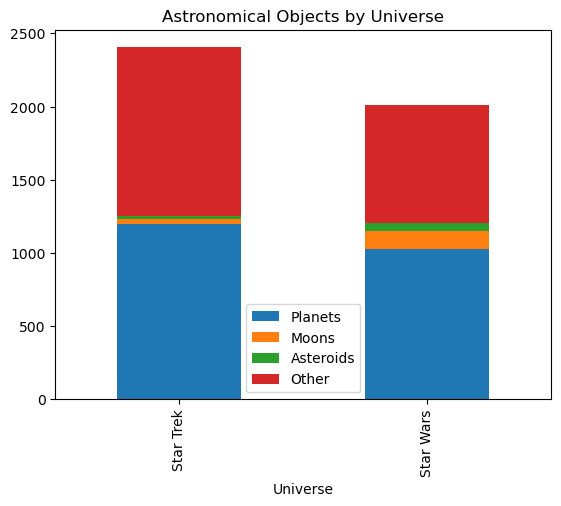

In [20]:
# Create stacked barcharts to show the differences between Star Trek and Star Wars

# Create data
ao = pd.DataFrame([['Star Trek', stplanets, stmoons, stasteroid, stother], ['Star Wars', swa_planets, swa_moons, swa_asteroids, sw_nei]],
                  columns=['Universe', 'Planets', 'Moons', 'Asteroids', 'Other'])

# View Data
print(ao)

# Plot data in stacked bar chart
ao.plot(x='Universe', kind='bar', stacked=True,
        title="Astronomical Objects by Universe")
plt.show()

Planets make up 50.464747222851955 percent
Moons make up 3.4912718204488775 percent
Asteroids make up 1.7002947177510768 percent


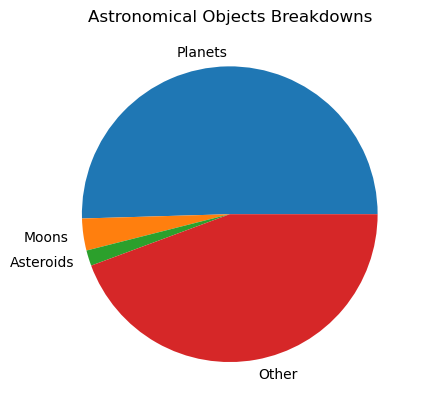

In [21]:
# Create a Pie Chart to show percentage of total planets, moons, asteroids and other

planets = stplanets + swa_planets
moons = stmoons + swa_moons
asteroids = stasteroid + swa_asteroids
other = stother + sw_nei
all_ao = planets + moons + asteroids + other

# Create percentages

# Planet percent
p_pct = (planets / all_ao * 100)
m_pct = (moons / all_ao * 100)
a_pct = (asteroids / all_ao * 100)
ao_pct = (100 - p_pct - m_pct - a_pct)

# Print Percentages
print(f'Planets make up {p_pct} percent')
print(f'Moons make up {m_pct} percent')
print(f'Asteroids make up {a_pct} percent')

# Create the pie chart
labels = ['Planets', 'Moons', 'Asteroids', 'Other']
sizes = [p_pct, m_pct, a_pct, ao_pct]

# Plot pie chart
plt.pie(sizes, labels=labels)
plt.title('Astronomical Objects Breakdowns')
plt.show()

Looking into the Astronomical Objects for both universes, and you see that both are very similar.  Around 50% of both universes deal with planets.  Asteroids and Moons complete around 5%, and everything else is the remaining 45%. Star Wars has a great amount of Moons, but two of its most famous battles occur on moons (Yavin 4/New Hope and Endor/Return of the Jedi).
